In [1]:
import pandas as pd

In [ ]:
import json
filePath = r"C:\\Users\\Pat\\Desktop\\Projects\\LoLAramPredictor\\Game Info\\"

In [ ]:
with open(filePath+'champion.json', encoding='utf8') as f:
    championData = json.load(f)

champions = pd.DataFrame(columns = ['championId', 'name', 'attack', 'defense', 'magic', 'difficulty', 'primaryClass', 'secondaryClass', 'partype', 'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage', 'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed'])

for k, v in championData['data'].items():
    champions = champions.append({'championId': int(v['key']),
                        'name': v['name'], 
                        'attack': v['info']['attack'], 
                        'defense': v['info']['defense'], 
                        'magic': v['info']['magic'], 
                        'difficulty': v['info']['difficulty'], 
                        'primaryClass': v['tags'][0], 
                        'secondaryClass': v['tags'][1] if len(v['tags']) > 1 else 'None', 
                        'partype': v['partype'], 
                        'hp': v['stats']['hp'], 
                        'hpperlevel': v['stats']['hpperlevel'], 
                        'mp': v['stats']['mp'], 
                        'mpperlevel': v['stats']['mpperlevel'], 
                        'movespeed': v['stats']['movespeed'], 
                        'armor': v['stats']['armor'], 
                        'armorperlevel': v['stats']['armorperlevel'], 
                        'spellblock': v['stats']['spellblock'], 
                        'spellblockperlevel': v['stats']['spellblockperlevel'], 
                        'attackrange': v['stats']['attackrange'], 
                        'hpregen': v['stats']['hpregen'], 
                        'hpregenperlevel': v['stats']['hpregenperlevel'], 
                        'mpregen': v['stats']['mpregen'], 
                        'mpregenperlevel': v['stats']['mpregenperlevel'], 
                        'crit': v['stats']['crit'], 
                        'critperlevel': v['stats']['critperlevel'], 
                        'attackdamage': v['stats']['attackdamage'], 
                        'attackdamageperlevel': v['stats']['attackdamageperlevel'], 
                        'attackspeedperlevel': v['stats']['attackspeedperlevel'], 
                        'attackspeed': v['stats']['attackspeed']}, ignore_index=True)

champions.set_index('championId', inplace=True)
champions

In [2]:
import asyncpg
import nest_asyncio
import asyncio
from config import dbConfig

nest_asyncio.apply()
loop = asyncio.get_event_loop()

In [ ]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        # allGamesQuery = f'SELECT "gameVersion", "gameMode", COUNT(1) \
        #                 FROM "Matches" \
        #                 GROUP BY "gameVersion", "gameMode"\
        #                 ORDER BY "gameVersion" ASC;'
        patchCountQuery = f'SELECT (string_to_array("gameVersion", \'.\'))[1] || \'.\' || (string_to_array("gameVersion", \'.\'))[2] AS patch, "gameMode" , COUNT(1) \
                        FROM "Matches" \
                        GROUP BY patch, "gameMode" \
                        ORDER BY "gameMode", patch;'
        patchCount_df = await fetch_as_dataframe(connection, patchCountQuery)

    return patchCount_df

patchCount_df = loop.run_until_complete(run())
patchCount_df.head(50)

In [ ]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        rankQuery = f'SELECT "highestAchievedSeasonTier", COUNT(1) \
                        FROM "Participant_Stats"\
                        GROUP BY "highestAchievedSeasonTier" \
                        ORDER BY "highestAchievedSeasonTier" ASC;'
        rank_df = await fetch_as_dataframe(connection, rankQuery)

    return rank_df

rank_df = loop.run_until_complete(run())
rank_df.head(10)

In [ ]:
# async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
#     stmt = await con.prepare(query)
#     columns = [a.name for a in stmt.get_attributes()]
#     data = await stmt.fetch()
#     return pd.DataFrame(data, columns=columns)

# async def run():
#     connection = await asyncpg.connect(user=dbConfig['user'],
#                                 password=dbConfig['password'],
#                                 host=dbConfig['host'],
#                                 port=dbConfig['port'],
#                                 database=dbConfig['database'])
#     async with connection.transaction():
#         allGamesQuery = f'SELECT p1."gameId"\
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."championId" END) AS champ_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."championId" END) AS champ_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."championId" END) AS champ_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."championId" END) AS champ_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."championId" END) AS champ_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."championId" END) AS champ_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."championId" END) AS champ_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."championId" END) AS champ_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."championId" END) AS champ_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."championId" END) AS champ_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."tier" END) AS "tier_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."tier" END) AS "tier_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."tier" END) AS "tier_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."tier" END) AS "tier_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."tier" END) AS "tier_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."tier" END) AS "tier_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."tier" END) AS "tier_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."tier" END) AS "tier_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."tier" END) AS "tier_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."tier" END) AS "tier_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."rank" END) AS "rank_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."rank" END) AS "rank_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."rank" END) AS "rank_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."rank" END) AS "rank_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."rank" END) AS "rank_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."rank" END) AS "rank_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."rank" END) AS "rank_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."rank" END) AS "rank_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."rank" END) AS "rank_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."rank" END) AS "rank_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."rankWins" END) AS "rankWins_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."rankWins" END) AS "rankWins_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."rankWins" END) AS "rankWins_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."rankWins" END) AS "rankWins_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."rankWins" END) AS "rankWins_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."rankWins" END) AS "rankWins_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."rankWins" END) AS "rankWins_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."rankWins" END) AS "rankWins_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."rankWins" END) AS "rankWins_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."rankWins" END) AS "rankWins_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."rankLosses" END) AS "rankLosses_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."rankLosses" END) AS "rankLosses_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."rankLosses" END) AS "rankLosses_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."rankLosses" END) AS "rankLosses_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."rankLosses" END) AS "rankLosses_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."rankLosses" END) AS "rankLosses_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."rankLosses" END) AS "rankLosses_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."rankLosses" END) AS "rankLosses_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."rankLosses" END) AS "rankLosses_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."rankLosses" END) AS "rankLosses_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."championPoints" END) AS "champPts_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."championPoints" END) AS "champPts_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."championPoints" END) AS "champPts_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."championPoints" END) AS "champPts_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."championPoints" END) AS "champPts_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."championPoints" END) AS "champPts_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."championPoints" END) AS "champPts_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."championPoints" END) AS "champPts_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."championPoints" END) AS "champPts_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."championPoints" END) AS "champPts_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."spell1Id" END) AS "spell1Id_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."spell1Id" END) AS "spell1Id_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."spell1Id" END) AS "spell1Id_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."spell1Id" END) AS "spell1Id_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."spell1Id" END) AS "spell1Id_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."spell1Id" END) AS "spell1Id_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."spell1Id" END) AS "spell1Id_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."spell1Id" END) AS "spell1Id_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."spell1Id" END) AS "spell1Id_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."spell1Id" END) AS "spell1Id_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."spell2Id" END) AS "spell2Id_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."spell2Id" END) AS "spell2Id_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."spell2Id" END) AS "spell2Id_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."spell2Id" END) AS "spell2Id_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."spell2Id" END) AS "spell2Id_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."spell2Id" END) AS "spell2Id_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."spell2Id" END) AS "spell2Id_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."spell2Id" END) AS "spell2Id_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."spell2Id" END) AS "spell2Id_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."spell2Id" END) AS "spell2Id_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk0" END) AS perk0_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk0" END) AS perk0_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk0" END) AS perk0_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk0" END) AS perk0_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk0" END) AS perk0_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk0" END) AS perk0_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk0" END) AS perk0_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk0" END) AS perk0_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk0" END) AS perk0_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk0" END) AS perk0_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk1" END) AS perk1_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk1" END) AS perk1_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk1" END) AS perk1_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk1" END) AS perk1_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk1" END) AS perk1_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk1" END) AS perk1_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk1" END) AS perk1_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk1" END) AS perk1_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk1" END) AS perk1_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk1" END) AS perk1_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk2" END) AS perk2_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk2" END) AS perk2_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk2" END) AS perk2_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk2" END) AS perk2_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk2" END) AS perk2_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk2" END) AS perk2_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk2" END) AS perk2_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk2" END) AS perk2_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk2" END) AS perk2_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk2" END) AS perk2_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk3" END) AS perk3_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk3" END) AS perk3_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk3" END) AS perk3_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk3" END) AS perk3_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk3" END) AS perk3_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk3" END) AS perk3_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk3" END) AS perk3_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk3" END) AS perk3_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk3" END) AS perk3_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk3" END) AS perk3_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk4" END) AS perk4_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk4" END) AS perk4_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk4" END) AS perk4_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk4" END) AS perk4_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk4" END) AS perk4_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk4" END) AS perk4_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk4" END) AS perk4_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk4" END) AS perk4_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk4" END) AS perk4_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk4" END) AS perk4_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk5" END) AS perk5_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk5" END) AS perk5_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk5" END) AS perk5_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk5" END) AS perk5_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk5" END) AS perk5_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk5" END) AS perk5_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk5" END) AS perk5_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk5" END) AS perk5_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk5" END) AS perk5_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk5" END) AS perk5_10 \
#         , MAX(p1."gameMode") AS "gameMode" \
#         , MAX(p1."gameVersion") AS "gameVersion" \
#         , BOOL_OR(CASE p2.Ranking WHEN 1 THEN p2."win" END) AS "blueTeamWin" \
#     FROM (SELECT p."gameId", p."teamColor", p."championId", c."championPoints", r."tier", r."rank", r."wins" AS "rankWins", r."losses" AS "rankLosses", p."spell1Id", p."spell2Id", p."perk0", p."perk1", p."perk2", p."perk3", p."perk4", p."perk5", m."gameMode", m."gameVersion", p."win" \
#                         FROM "Participant_Stats" AS p \
#                         LEFT JOIN "Matches" AS m \
#                         ON p."gameId" = m."gameId" \
#                         LEFT JOIN "Champion_Mastery" AS c \
#                         ON p."summonerName" = c."summonerName" AND p."championId" = c."championId" \
#                         LEFT JOIN (SELECT "summonerName", "queueType", "tier", "rank", "wins", losses \
#                             FROM "Rank" \
#                             WHERE "queueType" = \'RANKED_SOLO_5x5\') AS r \
#                         ON p."summonerName" = r."summonerName") AS p1 \
#     LEFT JOIN ( \
#         SELECT *, ROW_NUMBER() OVER (PARTITION by "gameId" ORDER BY "teamColor", "championId") AS Ranking \
#         FROM "Participant_Stats" \
#     ) AS p2 ON p2."gameId"= p1."gameId" AND p2."championId" = p1."championId"\
#     WHERE "gameMode" = \'ARAM\' \
#     GROUP BY p1."gameId";'
#         groupGames_df = await fetch_as_dataframe(connection, allGamesQuery)

#     return groupGames_df

# groupGames_df = loop.run_until_complete(run())
# groupGames_df.head(10)

In [ ]:
# print(groupGames_df[['gameId', 'champ_1', 'tier_1', 'rank_1', 'rankWins_1', 'rankLosses_1', 'champPts_1', 'spell1Id_1', 'spell2Id_1', 'perk0_1', 'perk1_1', 'perk2_1', 'perk3_1', 'perk4_1', 'perk5_1', 'gameMode', 'gameVersion', 'blueTeamWin']].head(50))

In [ ]:
# print(groupGames_df[['gameId', 'champ_1', 'tier_1', 'rank_1', 'rankWins_1', 'rankLosses_1', 'champPts_1', 'spell1Id_1', 'spell2Id_1', 'perk0_1', 'perk1_1', 'perk2_1', 'perk3_1', 'perk4_1', 'perk5_1', 'gameMode', 'gameVersion', 'blueTeamWin']].tail(50))

In [ ]:
async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        refreshQuery = f'REFRESH MATERIALIZED VIEW "games_mat_view";'
        status = await connection.execute(refreshQuery)
    return status

status = loop.run_until_complete(run())
print(status)

In [3]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        matViewQuery = f'SELECT * FROM "games_mat_view" ORDER BY "gameId" DESC'
        df = await fetch_as_dataframe(connection, matViewQuery)

    return df.drop(columns=['gameMode'])

df = loop.run_until_complete(run())
df.head(10)

,gameId,champ_1,champ_2,champ_3,champ_4,champ_5,champ_6,champ_7,champ_8,champ_9,...,perk5_3,perk5_4,perk5_5,perk5_6,perk5_7,perk5_8,perk5_9,perk5_10,gameVersion,blueTeamWin
0,3626925060,17,82,96,150.0,201.0,9.0,31.0,38.0,145.0,...,8135,8236.0,8009.0,8210.0,8014.0,8014.0,8210.0,9105.0,10.21.339.2173,True
1,3626916576,18,45,81,82.0,238.0,126.0,134.0,498.0,555.0,...,8210,8135.0,8014.0,8014.0,8347.0,8106.0,8347.0,8138.0,10.21.339.2173,True
2,3626893452,64,89,98,114.0,245.0,31.0,81.0,112.0,133.0,...,8233,8135.0,8210.0,8014.0,8236.0,8014.0,8135.0,8106.0,10.21.339.2173,False
3,3626847516,1,42,84,133.0,143.0,8.0,22.0,50.0,555.0,...,8135,8410.0,8014.0,9111.0,8135.0,8014.0,9111.0,8135.0,10.21.339.2173,False
4,3626844381,30,55,104,203.0,246.0,8.0,32.0,34.0,48.0,...,8135,8135.0,8299.0,8347.0,8106.0,8014.0,8009.0,8236.0,10.21.339.2173,False
5,3626833948,15,37,50,238.0,412.0,12.0,21.0,45.0,112.0,...,8237,8009.0,8009.0,9105.0,8126.0,8014.0,8236.0,8139.0,10.21.339.2173,False
6,3626811895,8,31,37,143.0,498.0,1.0,25.0,89.0,110.0,...,8233,8009.0,8233.0,8105.0,8347.0,8135.0,8135.0,8014.0,10.21.339.2173,False
7,3626807043,41,51,110,112.0,236.0,17.0,42.0,45.0,203.0,...,8139,8236.0,8135.0,8138.0,8135.0,8126.0,8143.0,9105.0,10.21.339.2173,False
8,3626804017,25,34,42,245.0,518.0,11.0,12.0,43.0,76.0,...,8226,8009.0,8236.0,8135.0,8453.0,8347.0,8304.0,8138.0,10.21.339.2173,True
9,3626801555,8,51,54,117.0,266.0,7.0,29.0,53.0,58.0,...,9105,8014.0,8453.0,8210.0,8106.0,8306.0,8143.0,8009.0,10.21.339.2173,True


In [ ]:
print(df.head(10))
print(df.columns.to_list())

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136981 entries, 0 to 2136980
Data columns (total 143 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         2136981 non-null  int64  
 1   champ_1        2136981 non-null  int64  
 2   champ_2        2136981 non-null  int64  
 3   champ_3        2136981 non-null  int64  
 4   champ_4        2136980 non-null  float64
 5   champ_5        2136980 non-null  float64
 6   champ_6        2136980 non-null  float64
 7   champ_7        2136980 non-null  float64
 8   champ_8        2136978 non-null  float64
 9   champ_9        2136975 non-null  float64
 10  champ_10       2136969 non-null  float64
 11  tier_1         1072948 non-null  object 
 12  tier_2         1077694 non-null  object 
 13  tier_3         1090527 non-null  object 
 14  tier_4         1112191 non-null  object 
 15  tier_5         1146326 non-null  object 
 16  tier_6         1079288 non-null  object 
 17  tier_7 

In [5]:
df1 = df
df1 = df1.dropna(axis=0, subset=['gameId', 'champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'gameVersion', 'blueTeamWin'], how='any')

In [8]:
# df1 = df1.astype({'gameId': 'uint64', 'champ_1': 'uint8', 'champ_2': 'uint8', 'champ_3': 'uint8', 'champ_4': 'uint8', 'champ_5': 'uint8', 'champ_6': 'uint8', 'champ_7': 'uint8', 'champ_8': 'uint8', 'champ_9': 'uint8', 'champ_10': 'uint8', 'spell1Id_1': 'uint8', 'spell1Id_2': 'uint8', 'spell1Id_3': 'uint8', 'spell1Id_4': 'uint8', 'spell1Id_5': 'uint8', 'spell1Id_6': 'uint8', 'spell1Id_7': 'uint8', 'spell1Id_8': 'uint8', 'spell1Id_9': 'uint8', 'spell1Id_10': 'uint8', 'spell2Id_1': 'uint8', 'spell2Id_2': 'uint8', 'spell2Id_3': 'uint8', 'spell2Id_4': 'uint8', 'spell2Id_5': 'uint8', 'spell2Id_6': 'uint8', 'spell2Id_7': 'uint8', 'spell2Id_8': 'uint8', 'spell2Id_9': 'uint8', 'spell2Id_10': 'uint8', 'perk0_1': 'uint16', 'perk0_2': 'uint16', 'perk0_3': 'uint16', 'perk0_4': 'uint16', 'perk0_5': 'uint16', 'perk0_6': 'uint16', 'perk0_7': 'uint16', 'perk0_8': 'uint16', 'perk0_9': 'uint16', 'perk0_10': 'uint16', 'perk1_1': 'uint16', 'perk1_2': 'uint16', 'perk1_3': 'uint16', 'perk1_4': 'uint16', 'perk1_5': 'uint16', 'perk1_6': 'uint16', 'perk1_7': 'uint16', 'perk1_8': 'uint16', 'perk1_9': 'uint16', 'perk1_10': 'uint16', 'perk2_1': 'uint16', 'perk2_2': 'uint16', 'perk2_3': 'uint16', 'perk2_4': 'uint16', 'perk2_5': 'uint16', 'perk2_6': 'uint16', 'perk2_7': 'uint16', 'perk2_8': 'uint16', 'perk2_9': 'uint16', 'perk2_10': 'uint16', 'perk3_1': 'uint16', 'perk3_2': 'uint16', 'perk3_3': 'uint16', 'perk3_4': 'uint16', 'perk3_5': 'uint16', 'perk3_6': 'uint16', 'perk3_7': 'uint16', 'perk3_8': 'uint16', 'perk3_9': 'uint16', 'perk3_10': 'uint16', 'perk4_1': 'uint16', 'perk4_2': 'uint16', 'perk4_3': 'uint16', 'perk4_4': 'uint16', 'perk4_5': 'uint16', 'perk4_6': 'uint16', 'perk4_7': 'uint16', 'perk4_8': 'uint16', 'perk4_9': 'uint16', 'perk4_10': 'uint16', 'perk5_1': 'uint16', 'perk5_2': 'uint16', 'perk5_3': 'uint16', 'perk5_4': 'uint16', 'perk5_5': 'uint16', 'perk5_6': 'uint16', 'perk5_7': 'uint16', 'perk5_8': 'uint16', 'perk5_9': 'uint16', 'perk5_10': 'uint16', 'gameVersion': 'category', 'blueTeamWin': 'bool'})

In [9]:
# df1.to_pickle('game_data_unclean.pkl')

In [28]:
import pandas as pd
# df1 = pd.read_pickle('game_data.pkl')
df1 = pd.read_pickle('game_data_unclean.pkl')

In [2]:
df1 = df1.dropna(axis=0, subset=['champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'tier_1', 'tier_2', 'tier_3', 'tier_4', 'tier_5', 'tier_6', 'tier_7', 'tier_8', 'tier_9', 'tier_10', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10', 'rankWins_1', 'rankWins_2', 'rankWins_3', 'rankWins_4', 'rankWins_5', 'rankWins_6', 'rankWins_7', 'rankWins_8', 'rankWins_9', 'rankWins_10', 'rankLosses_1', 'rankLosses_2', 'rankLosses_3', 'rankLosses_4', 'rankLosses_5', 'rankLosses_6', 'rankLosses_7', 'rankLosses_8', 'rankLosses_9', 'rankLosses_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'gameVersion', 'blueTeamWin'], how='any')

In [29]:
df1.fillna(value={'tier_1': 'UNRANKED', 'tier_2': 'UNRANKED', 'tier_3': 'UNRANKED', 'tier_4': 'UNRANKED', 'tier_5': 'UNRANKED', 'tier_6': 'UNRANKED', 'tier_7': 'UNRANKED', 'tier_8': 'UNRANKED', 'tier_9': 'UNRANKED', 'tier_10': 'UNRANKED', 'rank_1': 'UNRANKED', 'rank_2': 'UNRANKED', 'rank_3': 'UNRANKED', 'rank_4': 'UNRANKED', 'rank_5': 'UNRANKED', 'rank_6': 'UNRANKED', 'rank_7': 'UNRANKED', 'rank_8': 'UNRANKED', 'rank_9': 'UNRANKED', 'rank_10': 'UNRANKED', 'rankWins_1': 0, 'rankWins_2': 0, 'rankWins_3': 0, 'rankWins_4': 0, 'rankWins_5': 0, 'rankWins_6': 0, 'rankWins_7': 0, 'rankWins_8': 0, 'rankWins_9': 0, 'rankWins_10': 0, 'rankLosses_1': 0, 'rankLosses_2': 0, 'rankLosses_3': 0, 'rankLosses_4': 0, 'rankLosses_5': 0, 'rankLosses_6': 0, 'rankLosses_7': 0, 'rankLosses_8': 0, 'rankLosses_9': 0, 'rankLosses_10': 0, 'champPts_1': 0, 'champPts_2': 0, 'champPts_3': 0, 'champPts_4': 0, 'champPts_5': 0, 'champPts_6': 0, 'champPts_7': 0, 'champPts_8': 0, 'champPts_9': 0, 'champPts_10': 0}, inplace=True)

In [30]:
df1 = df1.astype({'gameId': 'uint64', 'champ_1': 'uint8', 'champ_2': 'uint8', 'champ_3': 'uint8', 'champ_4': 'uint8', 'champ_5': 'uint8', 'champ_6': 'uint8', 'champ_7': 'uint8', 'champ_8': 'uint8', 'champ_9': 'uint8', 'champ_10': 'uint8', 'tier_1': 'category', 'tier_2': 'category', 'tier_3': 'category', 'tier_4': 'category', 'tier_5': 'category', 'tier_6': 'category', 'tier_7': 'category', 'tier_8': 'category', 'tier_9': 'category', 'tier_10': 'category', 'rank_1': 'category', 'rank_2': 'category', 'rank_3': 'category', 'rank_4': 'category', 'rank_5': 'category', 'rank_6': 'category', 'rank_7': 'category', 'rank_8': 'category', 'rank_9': 'category', 'rank_10': 'category', 'rankWins_1': 'uint32', 'rankWins_2': 'uint32', 'rankWins_3': 'uint32', 'rankWins_4': 'uint32', 'rankWins_5': 'uint32', 'rankWins_6': 'uint32', 'rankWins_7': 'uint32', 'rankWins_8': 'uint32', 'rankWins_9': 'uint32', 'rankWins_10': 'uint32', 'rankLosses_1': 'uint32', 'rankLosses_2': 'uint32', 'rankLosses_3': 'uint32', 'rankLosses_4': 'uint32', 'rankLosses_5': 'uint32', 'rankLosses_6': 'uint32', 'rankLosses_7': 'uint32', 'rankLosses_8': 'uint32', 'rankLosses_9': 'uint32', 'rankLosses_10': 'uint32', 'champPts_1': 'uint64', 'champPts_2': 'uint64', 'champPts_3': 'uint64', 'champPts_4': 'uint64', 'champPts_5': 'uint64', 'champPts_6': 'uint64', 'champPts_7': 'uint64', 'champPts_8': 'uint64', 'champPts_9': 'uint64', 'champPts_10': 'uint64', 'spell1Id_1': 'uint8', 'spell1Id_2': 'uint8', 'spell1Id_3': 'uint8', 'spell1Id_4': 'uint8', 'spell1Id_5': 'uint8', 'spell1Id_6': 'uint8', 'spell1Id_7': 'uint8', 'spell1Id_8': 'uint8', 'spell1Id_9': 'uint8', 'spell1Id_10': 'uint8', 'spell2Id_1': 'uint8', 'spell2Id_2': 'uint8', 'spell2Id_3': 'uint8', 'spell2Id_4': 'uint8', 'spell2Id_5': 'uint8', 'spell2Id_6': 'uint8', 'spell2Id_7': 'uint8', 'spell2Id_8': 'uint8', 'spell2Id_9': 'uint8', 'spell2Id_10': 'uint8', 'perk0_1': 'uint16', 'perk0_2': 'uint16', 'perk0_3': 'uint16', 'perk0_4': 'uint16', 'perk0_5': 'uint16', 'perk0_6': 'uint16', 'perk0_7': 'uint16', 'perk0_8': 'uint16', 'perk0_9': 'uint16', 'perk0_10': 'uint16', 'perk1_1': 'uint16', 'perk1_2': 'uint16', 'perk1_3': 'uint16', 'perk1_4': 'uint16', 'perk1_5': 'uint16', 'perk1_6': 'uint16', 'perk1_7': 'uint16', 'perk1_8': 'uint16', 'perk1_9': 'uint16', 'perk1_10': 'uint16', 'perk2_1': 'uint16', 'perk2_2': 'uint16', 'perk2_3': 'uint16', 'perk2_4': 'uint16', 'perk2_5': 'uint16', 'perk2_6': 'uint16', 'perk2_7': 'uint16', 'perk2_8': 'uint16', 'perk2_9': 'uint16', 'perk2_10': 'uint16', 'perk3_1': 'uint16', 'perk3_2': 'uint16', 'perk3_3': 'uint16', 'perk3_4': 'uint16', 'perk3_5': 'uint16', 'perk3_6': 'uint16', 'perk3_7': 'uint16', 'perk3_8': 'uint16', 'perk3_9': 'uint16', 'perk3_10': 'uint16', 'perk4_1': 'uint16', 'perk4_2': 'uint16', 'perk4_3': 'uint16', 'perk4_4': 'uint16', 'perk4_5': 'uint16', 'perk4_6': 'uint16', 'perk4_7': 'uint16', 'perk4_8': 'uint16', 'perk4_9': 'uint16', 'perk4_10': 'uint16', 'perk5_1': 'uint16', 'perk5_2': 'uint16', 'perk5_3': 'uint16', 'perk5_4': 'uint16', 'perk5_5': 'uint16', 'perk5_6': 'uint16', 'perk5_7': 'uint16', 'perk5_8': 'uint16', 'perk5_9': 'uint16', 'perk5_10': 'uint16', 'gameVersion': 'category', 'blueTeamWin': 'bool'})

In [31]:
df1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136969 entries, 0 to 2136980
Data columns (total 143 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   gameId         2136969 non-null  uint64  
 1   champ_1        2136969 non-null  uint8   
 2   champ_2        2136969 non-null  uint8   
 3   champ_3        2136969 non-null  uint8   
 4   champ_4        2136969 non-null  uint8   
 5   champ_5        2136969 non-null  uint8   
 6   champ_6        2136969 non-null  uint8   
 7   champ_7        2136969 non-null  uint8   
 8   champ_8        2136969 non-null  uint8   
 9   champ_9        2136969 non-null  uint8   
 10  champ_10       2136969 non-null  uint8   
 11  tier_1         2136969 non-null  category
 12  tier_2         2136969 non-null  category
 13  tier_3         2136969 non-null  category
 14  tier_4         2136969 non-null  category
 15  tier_5         2136969 non-null  category
 16  tier_6         2136969 non-null  ca

In [5]:
df1.isna().sum()

gameId         0
champ_1        0
champ_2        0
champ_3        0
champ_4        0
              ..
perk5_8        0
perk5_9        0
perk5_10       0
gameVersion    0
blueTeamWin    0
Length: 143, dtype: int64

In [6]:
df1.shape

(2136969, 143)

In [55]:
columns = ['champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'tier_1', 'tier_2', 'tier_3', 'tier_4', 'tier_5', 'tier_6', 'tier_7', 'tier_8', 'tier_9', 'tier_10', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10', 'rankWins_1', 'rankWins_2', 'rankWins_3', 'rankWins_4', 'rankWins_5', 'rankWins_6', 'rankWins_7', 'rankWins_8', 'rankWins_9', 'rankWins_10', 'rankLosses_1', 'rankLosses_2', 'rankLosses_3', 'rankLosses_4', 'rankLosses_5', 'rankLosses_6', 'rankLosses_7', 'rankLosses_8', 'rankLosses_9', 'rankLosses_10', 'champPts_1', 'champPts_2', 'champPts_3', 'champPts_4', 'champPts_5', 'champPts_6', 'champPts_7', 'champPts_8', 'champPts_9', 'champPts_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'gameVersion', 'blueTeamWin']
for c in columns:
    print(f"---- {c} ---")
    print(df1[c].value_counts())

---- champ_1 ---
4      96187
1      89877
7      82454
10     80025
21     74559
       ...  
156        2
94         2
176        1
240        1
241        1
Name: champ_1, Length: 134, dtype: int64
---- champ_2 ---
51     55813
45     54473
25     54066
22     53489
21     51088
       ...  
241       42
176       35
242       34
171       19
165       11
Name: champ_2, Length: 137, dtype: int64
---- champ_3 ---
81     54080
99     50587
63     44566
51     43583
76     43319
       ...  
5        560
6        517
7        484
165      292
3         18
Name: champ_3, Length: 136, dtype: int64
---- champ_4 ---
202    55502
222    50476
110    50107
161    49154
99     47238
       ...  
15       302
14       117
13       101
8         13
7          5
Name: champ_4, Length: 135, dtype: int64
---- champ_5 ---
43     108001
11      96171
242     86988
156     82987
236     70244
        ...  
15         10
17         10
16          5
13          4
14          1
Name: champ_5, Length: 13

In [ ]:
# Target/Frequency Encoding
# Tree Based: CatBoost, Random Forest
# Natural groupings/bins

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
categorical_col = ['champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'tier_1', 'tier_2', 'tier_3', 'tier_4', 'tier_5', 'tier_6', 'tier_7', 'tier_8', 'tier_9', 'tier_10', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'gameVersion', 'blueTeamWin']

In [34]:
le = LabelEncoder()
for column in categorical_col:
    df1[column] = le.fit_transform(df1[column])

In [9]:
X = df1.drop(['gameId', 'blueTeamWin'], axis=1)
y = df1['blueTeamWin']

In [35]:
X = df1.drop(['gameId', 'blueTeamWin', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10'], axis=1)
y = df1['blueTeamWin']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [90]:
# del c
# del columns
del categorical_col
del column
del df1
# del X
# del y

In [11]:
import gc
gc.collect()
# gc.collect()

0

In [ ]:
# print(X_train.head())
# print(y_train.head())

In [37]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=4)
rfc.fit(X_train, y_train)
y_pred1 = rfc.predict(X_train)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
y_pred2 = rfc.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with 100 decision-trees : 1.0000
Model accuracy score with 100 decision-trees : 0.6287


In [38]:
from catboost import CatBoostClassifier, Pool

In [13]:
categorical_features_indices = ['champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'tier_1', 'tier_2', 'tier_3', 'tier_4', 'tier_5', 'tier_6', 'tier_7', 'tier_8', 'tier_9', 'tier_10', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'gameVersion']

In [39]:
categorical_features_indices = ['champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'tier_1', 'tier_2', 'tier_3', 'tier_4', 'tier_5', 'tier_6', 'tier_7', 'tier_8', 'tier_9', 'tier_10', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10', 'gameVersion']

In [15]:
from catboost.utils import get_gpu_device_count
print('I see %i GPU devices' % get_gpu_device_count())

I see 1 GPU devices


In [27]:
cbc = CatBoostClassifier(iterations=1000, learning_rate=0.1, eval_metric='Accuracy', boosting_type='Plain', use_best_model=True, task_type='GPU', early_stopping_rounds=100, devices='0', random_seed=42)
cbc.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test,y_test))

0:	learn: 0.5280421	test: 0.5147722	best: 0.5147722 (0)	total: 58.1ms	remaining: 58.1s
1:	learn: 0.5350526	test: 0.5257887	best: 0.5257887 (1)	total: 107ms	remaining: 53.4s
2:	learn: 0.5558338	test: 0.5358037	best: 0.5358037 (2)	total: 154ms	remaining: 51.3s
3:	learn: 0.5559589	test: 0.5358037	best: 0.5358037 (2)	total: 204ms	remaining: 50.8s
4:	learn: 0.5585879	test: 0.5353030	best: 0.5358037 (2)	total: 263ms	remaining: 52.3s
5:	learn: 0.5592138	test: 0.5332999	best: 0.5358037 (2)	total: 313ms	remaining: 51.8s
6:	learn: 0.5588383	test: 0.5322984	best: 0.5358037 (2)	total: 361ms	remaining: 51.2s
7:	learn: 0.5599649	test: 0.5418127	best: 0.5418127 (7)	total: 416ms	remaining: 51.6s
8:	learn: 0.5627191	test: 0.5473210	best: 0.5473210 (8)	total: 470ms	remaining: 51.7s
9:	learn: 0.5642213	test: 0.5453180	best: 0.5473210 (8)	total: 523ms	remaining: 51.7s
10:	learn: 0.5643465	test: 0.5458187	best: 0.5473210 (8)	total: 582ms	remaining: 52.3s
11:	learn: 0.5633450	test: 0.5468202	best: 0.5473210

In [20]:
y_pred1 = cbc.predict(X_train)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
y_pred2 = cbc.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [16]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, cbc.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [17]:
feature_score.head(50)

,Feature,Score
6,champ_7,14.495373
59,champPts_10,13.963228
9,champ_10,11.339271
54,champPts_5,10.833838
1,champ_2,7.967597
8,champ_9,6.173377
7,champ_8,5.193336
50,champPts_1,4.478143
51,champPts_2,4.128509
5,champ_6,3.733216


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

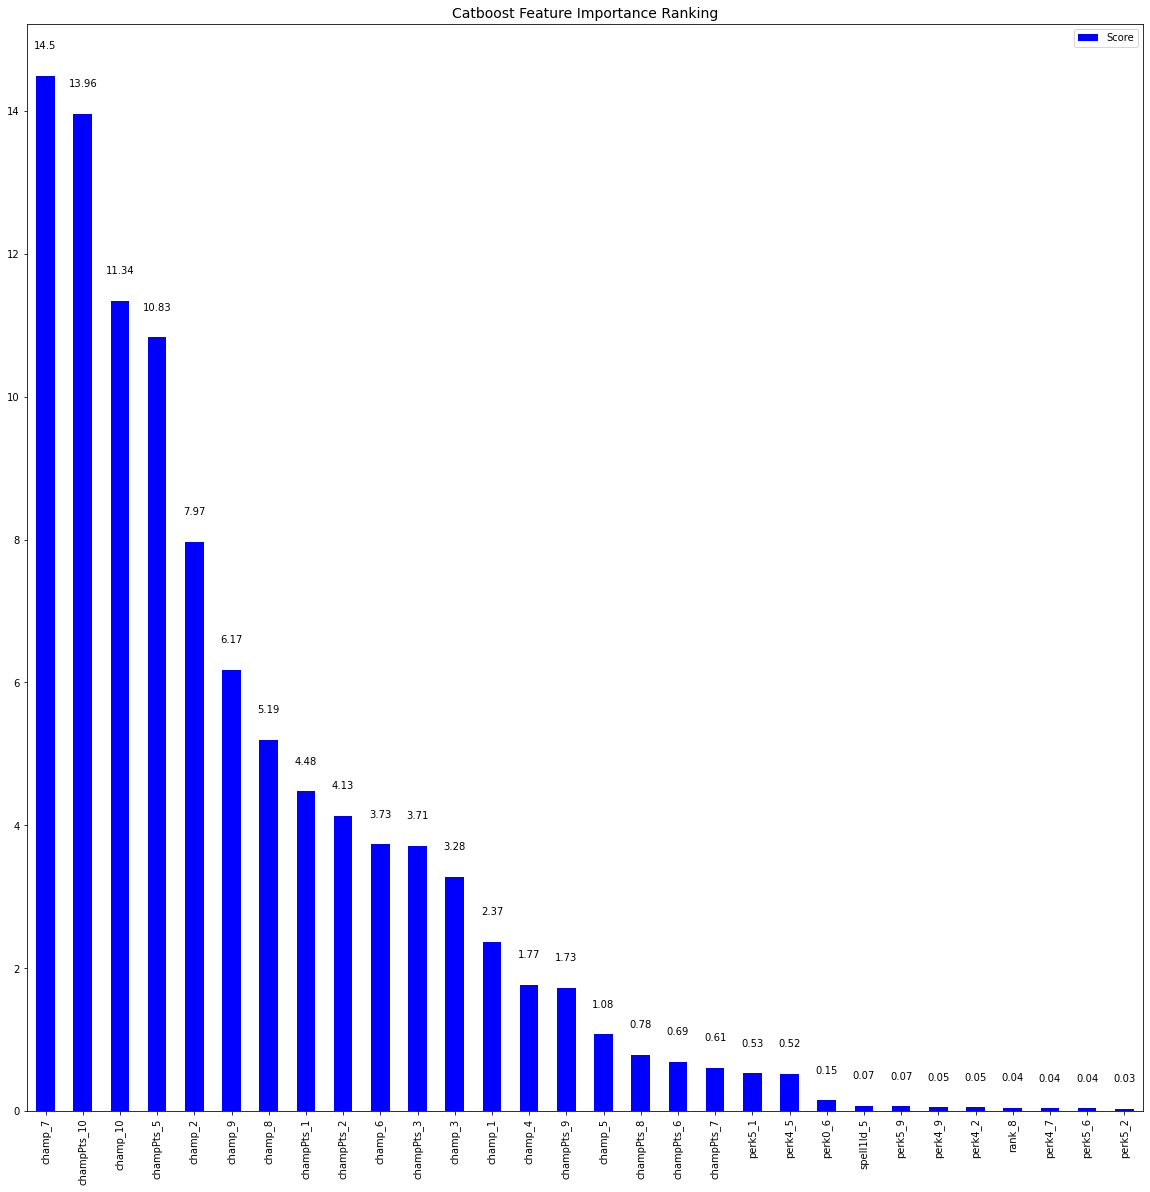

In [19]:
plt.rcParams["figure.figsize"] = (20,20)
ax = feature_score.head(30).plot('Feature', 'Score', kind='bar', color='b')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()